In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [30]:
iris.data=iris.data[: ,-2:]

 <b>We will use only petal length and petal width for simplicity.</b>

In [35]:
df = pd.DataFrame(iris.data,columns=["petal length (cm)","petal width (cm)"])
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


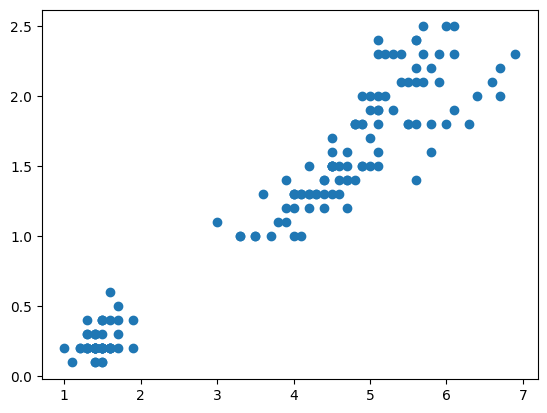

In [39]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [47]:
km=KMeans(n_clusters=3,n_init="auto")
y_predicted=km.fit_predict(df[["petal length (cm)","petal width (cm)"]])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
df['cluster']=y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [51]:
km.cluster_centers_

array([[5.62608696, 2.04782609],
       [1.462     , 0.246     ],
       [4.29259259, 1.35925926]])

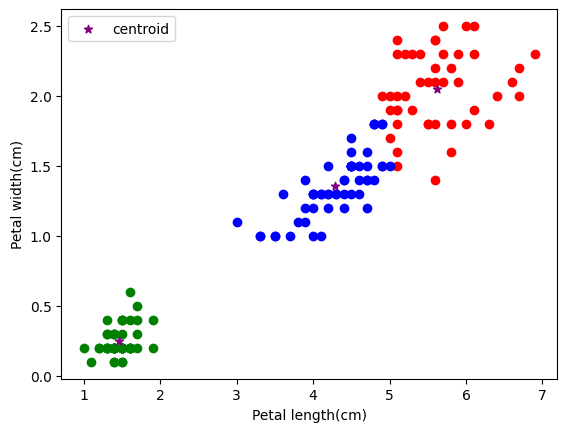

In [61]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color="red")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color="green")
plt.scatter(df3["petal length (cm)"],df3["petal width (cm)"],color="blue")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Petal length(cm)')
plt.ylabel('Petal width(cm)')
plt.legend()

In [72]:
sse=[]
k_range=range(1,10)
for i in k_range:
    km=KMeans(n_clusters=i,n_init="auto")
    km.fit(df[["petal length (cm)","petal width (cm)"]])
    sse.append(km.inertia_)

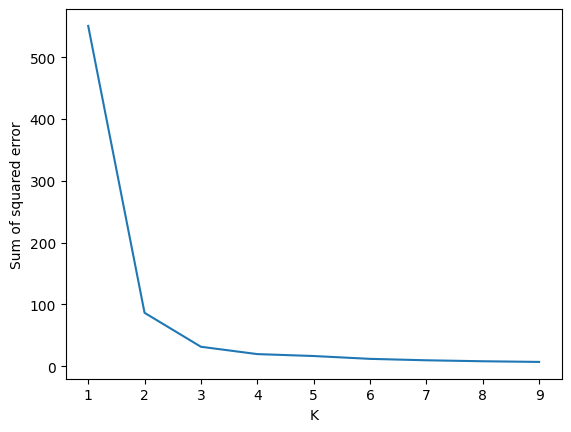

In [73]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

<strong> As We can see 3 is the best value of n_clusters argument according to Elbow method.<br>
The cluster value where this decrease in inertia value becomes constant can be chosen as the right cluster value for our data.